In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv("Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [19]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [20]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [21]:
df.isnull().sum()
df = df.dropna()


In [22]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year

df[['Date', 'Year']].head()


,Date,Year
0,2019-05-31,2019
1,2019-06-30,2019
2,2019-07-31,2019
3,2019-08-31,2019
4,2019-09-30,2019


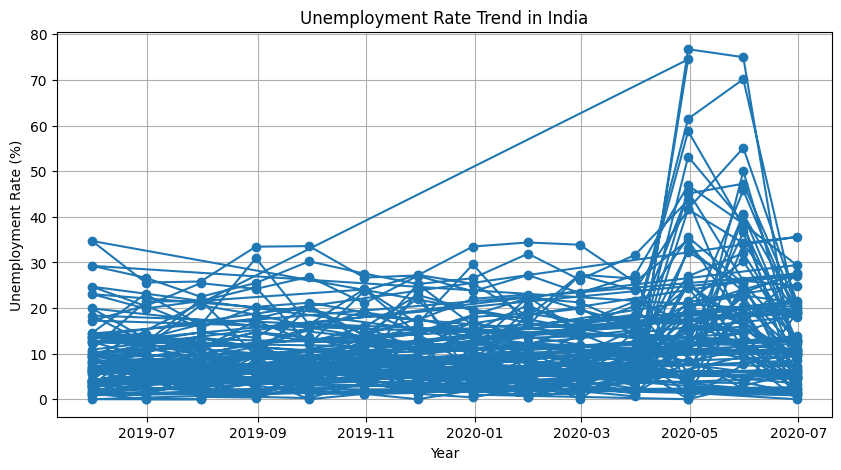

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], marker='o')

plt.title("Unemployment Rate Trend in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

plt.show()


In [24]:
covid_data = df[(df['Year'] >= 2020) & (df['Year'] <= 2021)]
covid_data


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural,2020
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural,2020
10,Andhra Pradesh,2020-03-31,Monthly,4.06,11359660.0,40.66,Rural,2020
11,Andhra Pradesh,2020-04-30,Monthly,16.29,8792827.0,36.03,Rural,2020
12,Andhra Pradesh,2020-05-31,Monthly,14.46,9526902.0,38.16,Rural,2020
...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,2020


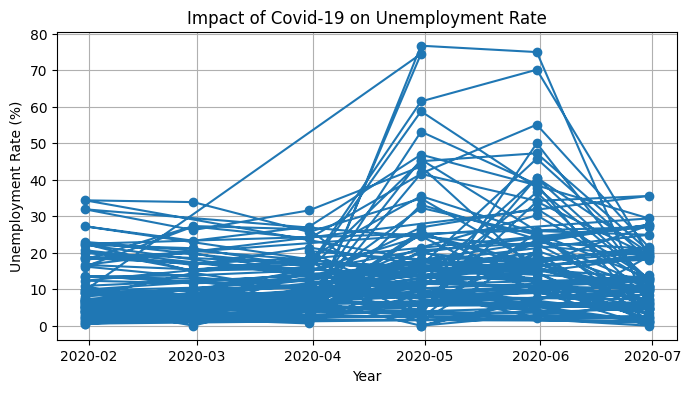

In [26]:
plt.figure(figsize=(8,4))
plt.plot(covid_data['Date'], covid_data['Estimated Unemployment Rate (%)'], marker='o')

plt.title("Impact of Covid-19 on Unemployment Rate")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

plt.show()


In [27]:
yearly_avg = df.groupby('Year')['Estimated Unemployment Rate (%)'].mean()
yearly_avg


,Estimated Unemployment Rate (%)
Year,
2019,9.399047
2020,15.101581


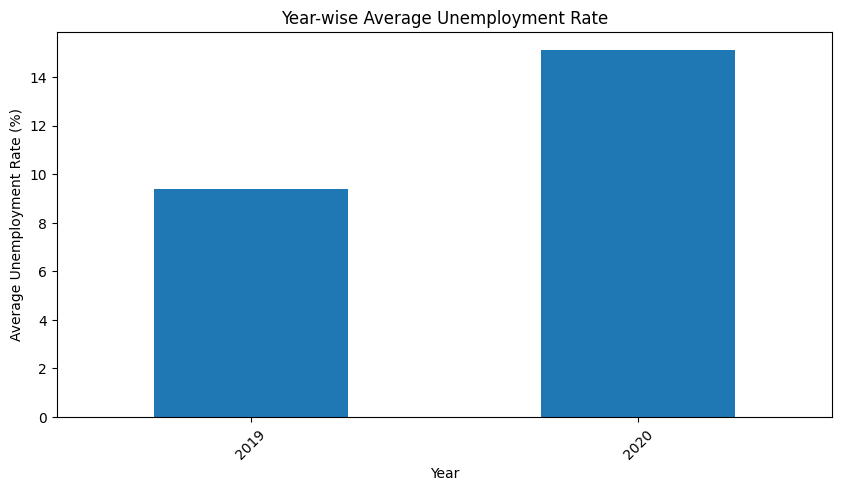

In [28]:
plt.figure(figsize=(10,5))
yearly_avg.plot(kind='bar')

plt.title("Year-wise Average Unemployment Rate")
plt.xlabel("Year")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=45)

plt.show()


In [29]:
df['Month'] = df['Date'].dt.month

monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
monthly_avg


,Estimated Unemployment Rate (%)
Month,
1,9.950755
2,9.964717
3,10.700577
4,23.641569
5,16.646190
6,10.553462
7,9.033889
8,9.637925
9,9.051731


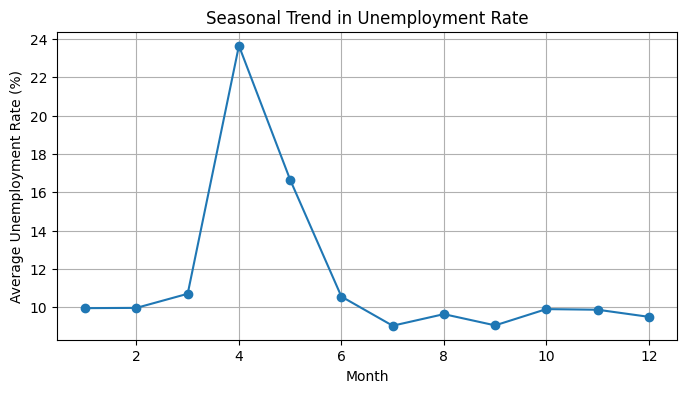

In [30]:
plt.figure(figsize=(8,4))
monthly_avg.plot(kind='line', marker='o')

plt.title("Seasonal Trend in Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(True)

plt.show()
